In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('../datasets/train.csv')

In [3]:
train_data.shape

(878049, 9)

In [4]:
train_data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [5]:
train_data.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [6]:
categorys = train_data['Category'].unique()
categorys

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [7]:
# 犯罪类别个数
len(categorys)

39

In [8]:
Pd_districts = train_data['PdDistrict'].unique()
Pd_districts

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [9]:
len(Pd_districts)

10

In [10]:
test_data = pd.read_csv('../datasets/test.csv')

In [11]:
test_data.shape

(884262, 7)

In [12]:
test_data.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [13]:
test_data.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [14]:
train_data[train_data['PdDistrict'] == 'NORTHERN'].shape[0]

105296

In [18]:
districtData = {'district': [], 'counts': [] }
for dis in train_data['PdDistrict'].unique():
    districtData['district'].append(dis)
    districtData['counts'].append(train_data[train_data['PdDistrict'] == dis].shape[0])

In [19]:
print(districtData)

{'district': ['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL', 'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], 'counts': [105296, 49313, 78845, 89431, 45209, 85460, 65596, 81809, 119908, 157182]}


In [30]:
disData = pd.DataFrame(districtData)
disData = disData.sort_values(by=['counts'], ascending=False)

In [31]:
disData.head(1)

,district,counts
9,SOUTHERN,157182


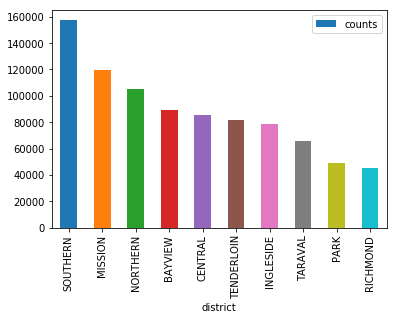

In [34]:
a = disData.plot.bar(x='district', y='counts')

In [42]:
W,H = a.figure.get_size_inches()
a.figure.set_size_inches(W,H+1)
a.figure.savefig('../images/PdDistrict')